# Probabiity Models and Maximum Likelihood Estimates 

### Probability Model

* A probability model $P(X|\theta)$ relates possible values of data X with a set of one or more parameter values $\theta$ of a probability distribution.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom  #this is the binomial probability distribution or mass function
from scipy.optimize import minimize #

### Binomial Distribution 

We can write that $X$ is distributed (or sampled from) as a binomial distribution 

$$ X \sim B(n,p)  $$

where the probability of getting $ k $ successes in $ n $ trials is given by the probability mass function

$$ p(X = k) = {n \choose k} p^k (1-p)^{n-k} $$

* For a Binomial probability model the parameter $\theta = \{p\}$ where $p$ is the probability of success.   

* In the probability model $n$ is a fixed value determined by the number of times you perform the experiment.

### Normal Distribution 

We can write that is $X$ is sampled from a normal distribution, 


$$ X \sim \mathcal{N}(\mu, \sigma^2) $$

with probability density function

$$ p_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\!\left( -\frac{(x-\mu)^2}{2\sigma^2} \right) $$

* The parameters of the probability model are $\theta = \{\mu, \sigma\}$  where $\mu$ is the mean and $\sigma$ is the standard deviation.

### Conditional Probability

If $\theta$ is fixed and $X$ is allowed to vary, the probability model $P(X|\theta)$ describes the **conditional** probability of the data $X$ given the parameters.

* For example, I can compute the probability of 6 heads in 10 flips of a fair coin using a binomial distribution. 
* Each coin flip is a Bernoulli process with heads is defined as a success.  
* In this case my observation is $x = \{6\}$ and $\theta = \{p\} = \{0.5\}$ and the binomial distribution can be used to calculate the probability 

$$ P(x|\theta) = {10 \choose 6}(0.5)^6(0.5)^4 $$

* The conditional probability over all possible values of $x$ sums to 1, just like any other probability.
* In fact it is just a statement of the probability distribution with the parameter $\theta$ fixed at a known value

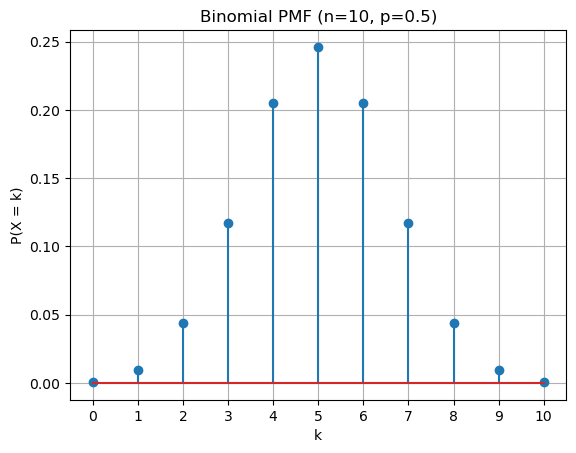

In [8]:
# Parameters
n = 10
p = 0.5

k = np.arange(0, n + 1)

# Binomial PMF
pmf = binom.pmf(k, n, p)

plt.stem(k, pmf)
plt.xticks(k)
plt.xlabel('k')
plt.ylabel('P(X = k)')
plt.title(f'Binomial PMF (n={n}, p={p})')
plt.grid(True)
plt.show()


### Likelihood 

**Likelihood** is a **function** of the parameters, $\theta$  that takes a probability model $P(x|\theta)$, but treats the data x as \textit{fixed} while $\theta$ varies.

$ L(\theta) = P(x|\theta) $

* **Likelihood is not a probability distribution**  
* In fact each different value of the parameters $\theta$ specifies a **different probability distribution**. 
* Likelihood measures the probability of the data for different values of the parameters $\theta$, i.e., different probability distributions.  
* Unlike probability distributions, **there is no constraint that the total likelihood must be one.**
* Most importantly, the sum of the likelihood over all possible values of $\theta$ can be arbitrary. 

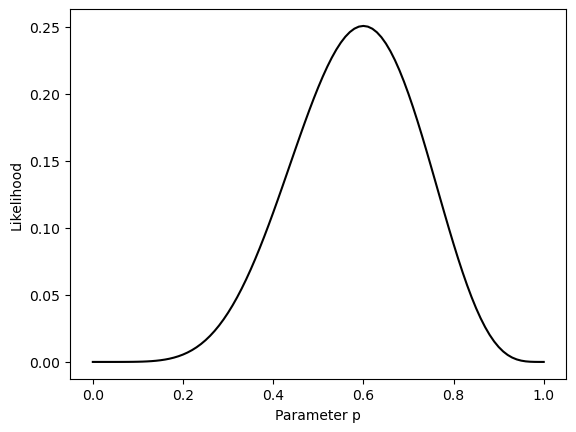

In [10]:
#plot the binomial likelihood
nsuccess = 6 # number of successes  
nfailures = 4 # number of failures
n = nsuccess + nfailures # total number of trials   

p = np.linspace(0,1,101); # possible values of p
likelihood = np.zeros(101)
for j in range(len(p)):
    likelihood[j] = binom.pmf(nsuccess,n,p[j]);

plt.figure()
plt.plot(p,likelihood,'k-')
plt.xlabel('Parameter p')
plt.ylabel('Likelihood')
plt.show()  

### Likelihood Principle and Law of Likelihood

The likelihood function contains all of the information relevant to the evaluation of statistical evidence.

Given a probability model a set of data supports one hypothesis over another hypothesis -

**if the conditional probability of the data given one hypothesis is greater than the conditional probability of the data given the other hypothesis**  

* The data X is evidence favoring parameters $\theta_1$ over $\theta_2$ if $P(X|\theta_1) > P(X|\theta_2)$
* The absolute value of Likelihood is never important.  
* It is the relative value of likelihood for different choices of parameters $\theta$ that is important. That is, \textit{it can be used to compare hypothesis about data}.
* In most cases, a hypothesis represents a value of a parameter in a statistical model, such as the mean of a normal distribution. 
* The Likelihood Ratio (LR) is a measure of the relative probability of two hypothesis.  

$$ LR(\theta_1,\theta_2) = \frac{L(\theta_1)}{L(\theta_2)}= \frac{P(X|\theta_1)}{P(X|\theta_2)}$$

* The likelihood ratio comparing two statistical hypotheses contains “all the information which the data provide concerning the relative merits” of those hypotheses.
* The likelihood ratio is a lot like betting odds! 

### Comparison of Likelihoods - Binomial Distribution

Suppose we carry out an experiment where we flip the coin 10 times and observe 6 heads. 

We can compute the likelihood of the data we observed under two hypothesis: 

* $\theta_1: p = 0.5$ - coin is fair 
* $\theta_2: p = 0.75$ - coin is biased to heads (trick coin)


$$ L(\theta_1) = p(X = 6|\theta_1) = {10 \choose 6}(0.5)^6(0.5)^4 $$
$$ L(\theta_2) = p(X = 6|\theta_2) = {10 \choose 6}(0.75)^6(0.25)^4 $$

To quantify the statistical evidence for the first hypothesis against the second, we simply divide one likelihood by the other. 

$$ LR(\theta_1,\theta_2) = \frac{L(\theta_1)}{L(\theta_2)} $$

$$ LR(\theta_1,\theta_2) = \frac{{10 \choose 6}(0.5)^6(0.5)^4}{{10 \choose 6}(0.75)^6(0.25)^4} = 1.4  $$
	
* In other words, the data are 1.4 times more probable under the fair-coin hypothesis than under the trick-coin hypothesis. 
* Notice how the first terms in the two equations, ${10 \choose 6}$, are equivalent and completely cancel each other out in the likelihood ratio - these are just details of the experiment.   

### Maximum Likelihood Estimate (MLE)

* A reasonable estimate of the best choice of the the parameters of a probability model $\theta$ is the values of the parameters that give rise to the peak of the likelihood function. 
* This is known as a \textit{Maximum Likelihood Estimate (MLE)} of the parameters of the probability model. 
* The likelihood function can also be used to tell us something about the uncertainty of the parameters.


###  MLE estimates for Bimomial Distribution

For a binomial distribution $B(n,p)$, the likelihood and the conditional probability distribution are identical.

If we observe $k$ heads in $n$ coin tosses, the likelihood is simply 

$$ L(p) = {n \choose k} p^k (1-p)^{n-k}$$

To find the maximum of this function, we can take the derivative with respect to the parameter $p$, and set equal to zero.
#
$$\frac{\partial{L}}{\partial{p}} = 0$$

* It is often the case that the **log-likelihood** is easier to work with.  
* Because the log function is a monotonic function the maximum of the likelihood and the log-likelihood occur at the same value of the parameter $p$.

$ ln(L) = ln({n \choose k} + ln(p^k) + ln(1-p^{n-k}) $

$ ln(L) = ln({n \choose k} +k ln(p) + (n-k)ln(1-p) $ 

$ \frac{\partial{L}}{\partial{p}} = \frac{k}{p} - \frac{n-k}{1-p} = 0 $ 

$ k(1-p) = (n-k)p $

$$ p = \frac{k}{n} $$

As we have already seen,  the maximum likelihood estimate of $p$ is the just the fraction of successes in the experiment! 

### Computational Methods

* In the example of the binomial and normal distribution, its possible to derive an MLE estimate.   In general, that wont be true.
* Depending on the complexity of the model and the form of the likelihood function, taking the derivative with respect to each parameter may not be that easy. 
* Even if we can take the derivative of the likelihood with respect to each parameter, that equation may not be a linear equation.  In that case, it may not be easy to solve. 
* So, we need to have computational methods to find the maximum likelihood.   \
* To keep it simple here, I am going to use `scipy.optimize` module and its `minimize` function. 
* To find the maximum likelihood, we will mimimize the negative of likelihood.  

In [ ]:
#define my likelihood function
def neglikebin(p):
    neglike = -binom.pmf(nsuccess,n,p)  #please note the use of global variables nsuccess and n here.   
    #note I put a negative in front of the likelihood equation. Computer programs minimize functions.     
    return neglike

In [19]:
nsuccess = 6
n = 10
bnds = ((0,1),) #bounds for p.  This syntax is for one parameter.  For two parameters, it would be ((0,1),(0,1))
paramfit = minimize(neglikebin,0.5,bounds = bnds); #initial guess is 0.5
pfit = paramfit['x']
print(pfit)

[0.59999964]


###  Likelihood of Normal Distribution

If we have a set of samples \{$x_n$\}, n = 1,..,N that we wish to fit to a normal distribution, we have to develop an expression for the the Likelihood. 

The Normal distribution has probability density 

$$ \mathcal{p}(x |\mu,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}} $$
where $\mu$ is the mean and $\sigma^2$ is the variance or standard deviation squared.  

The Likelihood for the set of observation \{$x_n$\}, n = 1,..N is the product of the normal density for each observation, 

$$L(\mu,\sigma) = P(\{x_n\}|\mu,\sigma) = \prod_{n=1}^N \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x_n-\mu)^2}{2\sigma^2}}$$
$$L(\mu,\sigma) = P(\{x_n\}|\mu,\sigma) =  \frac{1}{\sigma\sqrt{2\pi}}^Ne^{\frac{-\sum_{n=1}^{N}(x_n-\mu)^2}{2\sigma^2}}$$


## MLE for $\mu$ of a Normal Distribution

To compute the MLE for $\mu$ we need to evaluate $\frac{\partial{L(\mu,\sigma)}}{\partial{\mu}} = 0$

We take advantage of evaluate the log likelihood, using the natural logarithm 

$ln(L(\mu,\sigma)) = -Nln(\sigma\sqrt{2\pi})-\frac{\sum_{n=1}^{N}(x_n-\mu)^2}{2\sigma^2}$

$\frac{\partial{ln(L(\mu,\sigma)}}{\partial{\mu}} = \frac{\sum_{n=1}^{N}(x_n-\mu)}{\sigma^2} = 0$ 

$\displaystyle\sum_{n=1}^N{x_n} - N\mu = 0$

$\mu = \frac{1}{N} \displaystyle\sum_{n=1}^N{x_n} $ 

The MLE estimate of $\mu$ is the sample mean. 

Its a similar derivation to show that the MLE estimate of $\sigma^2$ is the sample variance. 

### Sum of Squared Errors/Sample Variance
Lets consider the form of the log-Likelihood and its relationship to error. 

$$ln(L(\mu,\sigma)) = -Nln(\sigma\sqrt{2\pi})-\frac{\sum_{n=1}^{N}(x_n-\mu)^2}{2\sigma^2}$$

* The first term is independent of the data $x_n$.
* The second term, is a normalized measure of error if you were to model the data with the mean.  
* Specifically it is one-half the sum of squared errors, divided by variance $\sigma^2$

## Likelihood Ratios for the Normal Distribution.  
Let's consider two hypothesis about the data, which are expressed as 
$$H_1: \theta_1 = \{\mu,\sigma\} = \{\mu_1,\sigma\}$$
$$H_2: \theta_2 = \{\mu,\sigma\} = \{\mu_2, \sigma\}$$
#
Often, we only have a hypothesis about $\mu$ and assume sigma is some unknown value fixed across models

We could then compare our hypothesis using a likelihood ratio
The Likelihood Ratio (LR) is a measure of the relative probability of two hypothesis.  

$$ LR(\theta_1,\theta_2) = \frac{L(\theta_1)}{L(\theta_2)}$$

The Likelihood Ratio tells me the odds between the two hypothesis. With a logarithm, 

$$ ln(LR(\theta_1,\theta_2)) = ln(L(\theta_1))-ln(L(\theta_2))$$

* Thus we can look at which log-Likelihood is larger to determine which hypothesis is more probable. 
* Conversely, we can look at which negative log-Likelihood is smaller to determine which hypothesis is more probable. 

In [24]:
def negloglikenormal(mu,sigma):
    ''' Please note that this function uses a global variable called data, which is the data you are fitting'''
    N = len(data)
    negloglike = N*np.log(sigma*np.sqrt(2*np.pi))+np.sum((data-mu)**2)/(2*sigma**2)
    return negloglike

### Mixture Model using Likelihood Comparisons 

A common question we ask of data is whether the data comes from one probability distribution, or it comes from two different probability distributions.  

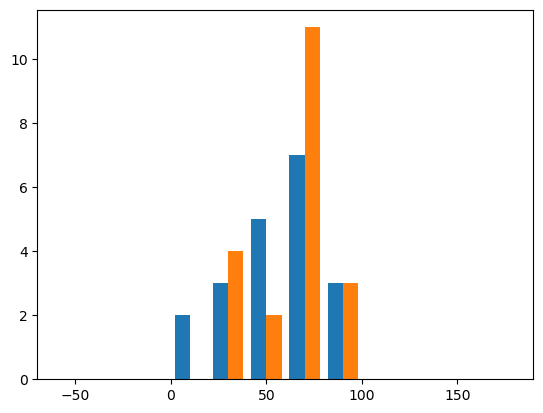

In [26]:
rng = np.random.default_rng(1967) #set the random number generator seed for reproducibility
nsamps = 20
data_all = np.zeros(2*nsamps)
mu1 = 50
sig1 = 20
data1 = rng.normal(mu1,sig1,nsamps)
mu2 = 60
sig2 = 20
data2 =  rng.normal(mu2,sig2,nsamps)
data_all[0:nsamps] = data1;
data_all[nsamps:2*nsamps] = data2;

#%% MLE estimates
#one model
mu = np.mean(data_all)
sigma = np.std(data_all)
#two model
mu1 = np.mean(data1)
sigma1 = np.std(data1)
mu2 = np.mean(data2)
sigma2= np.std(data2)
plt.hist([data1,data2],np.arange(-60,200,20))

plt.show()

In intro statistics classes we are taught to now reach for a t-test to test the significance of the two groups.  
We set up a null hypothesis that there is no difference.  Then we try to reject the null hypothesis usually using a T-test. 

If we succeed we say the mean of the two groups is different, i.e., there are two different probability distributions. 
If we fail, we say there is no significant difference.

In [29]:
#one distribution: 
data = data_all
negloglike_1dist = negloglikenormal(mu,sigma)
#two distributions.  Partition the data, and compute neg log likelihood for each part.  
data = data1
negloglike_1 = negloglikenormal(mu1,sigma1)
data = data2
negloglike_2 = negloglikenormal(mu2,sigma2)
# you can sum the two negative log likelihoods together. 
negloglike_2dist = negloglike_1+negloglike_2

print('Negative log likelihood one distribution: ',negloglike_1dist)
print('Negative log likelihood two distributions: ',negloglike_2dist)

Negative log likelihood one distribution:  180.69192773249932
Negative log likelihood two distributions:  179.08673585914994


### The Problem of overfitting data 

The evidence here suggests there are two distributions, because i get a lower log likelihood. 

However, the probability of 2 means and 2 standard deviations is always higher than the probability of one mean and one standard deviation.  

Consider the limiting case where we believe each sample comes from a different distribution.  In that case, the mean of each distribution is that sample value, and each distribution perfectly models that data (standard deviation is 0).

This is what we experienced with k-NN regression. 

Adding parameters or complexity to a model will always **make the model fit better**  

But, a model that is overfit, cannot **predict** well.

In other courses, we might develop now criterion like AIC (described below) or BIC (look it up) to decide whether we like one model or the other. 

In this class we will evaluate how well the models predict new data, by computing the likelihood of test data. 

## Akaike Information Crierion (AIC)

Suppose that we have a probability model of some data. Let k be the number of estimated parameters in the model. 

Let $\hat{L}$ be the maximized value of the likelihood function for a model with $k$ parameters. 

Then the AIC value of the model is the following:

$$ AIC = 2k - 2*ln(\hat{L}) $$

Given a set of candidate models for the data, the preferred model is the one with the minimum AIC value. 

AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters. 

The penalty discourages overfitting, which is desired because increasing the number of parameters in the model almost always improves the goodness of the fit. 

In [31]:
k1 = 2 # for one distribution there are 2 parameters
AIC_1dist = 2*negloglike_1dist + 2*(k1)
k2 = 4 # for two distributions there are 4 parameters 
AIC_2dist = 2*negloglike_2dist + 2*(k2)
print('AIC one distribution: ',AIC_1dist)
print('AIC two distributions: ',AIC_2dist)

AIC one distribution:  365.38385546499865
AIC two distributions:  366.1734717182999
